In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data import and cleaning

In [65]:
playstore_data = pd.read_csv('googleplaystore.csv')
user_reviews = pd.read_csv('googleplaystore_user_reviews.csv')

In [66]:
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [67]:
playstore_data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [4]:
user_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [5]:
playstore_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
user_reviews.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [7]:
user_reviews.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [8]:
playstore_data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [9]:
playstore_data.shape

(10841, 13)

In [10]:
playstore_data['Rating'].fillna(playstore_data['Rating'].mean(), inplace=True)

In [11]:
playstore_data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [12]:
playstore_data = playstore_data.dropna()

In [13]:
playstore_data.shape

(10829, 13)

# Correlation between Rating and Reviews

In [14]:
corr = playstore_data[['Rating', 'Reviews']].corr()
print("Correlation between Rating and Reviews")
corr

Correlation between Rating and Reviews


,Rating,Reviews
Rating,1.000000,0.067945
Reviews,0.067945,1.000000


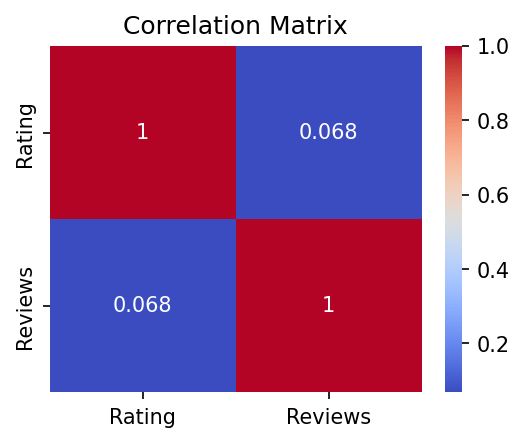

In [15]:
plt.figure(figsize=(4,3),dpi=150)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

# Impact of Last Updated Date on App Rating

In [16]:
playstore_data['Last Updated'] = pd.to_datetime(playstore_data['Last Updated'])

In [17]:
playstore_data['Last Updated Year'] = playstore_data['Last Updated'].dt.year

In [18]:
last_updated_performance = playstore_data.groupby('Last Updated Year')['Rating'].mean().reset_index()

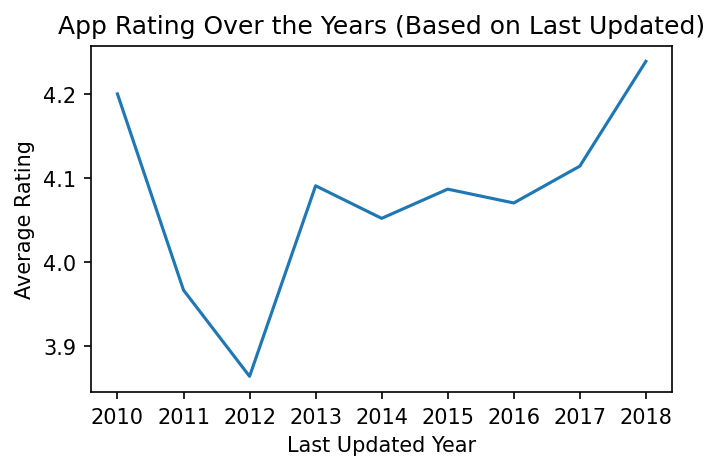

In [56]:
plt.figure(figsize=(5,3),dpi=150)
sns.lineplot(x='Last Updated Year', y='Rating', data=last_updated_performance)
plt.title('App Rating Over the Years (Based on Last Updated)')
plt.ylabel('Average Rating')
plt.show()

# Popularity Analysis

In [20]:
top_categories = playstore_data.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)
print(top_categories)

Category
PRODUCTIVITY           500,000,000+10,000,000+100,000,000+10,000,000+...
BEAUTY                 500,000+1,000,000+100,000+500,000+1,000,000+50...
FAMILY                 50,000,000+10,000,000+100,000,000+1,000,000+5,...
WEATHER                50,000,000+1,000,000+50,000,000+10,000+10,000,...
PERSONALIZATION        50,000,000+1,000,000+100,000,000+5,000,000+100...
LIBRARIES_AND_DEMO     50,000+10,000+100,000+1,000+100,000+10,000+100...
LIFESTYLE              5,000,000+10,000,000+100,000+10,000,000+5,000,...
BOOKS_AND_REFERENCE    100,000,000+50,000+100,000+10,000,000+100,000,...
MAPS_AND_NAVIGATION    100,000,000+5,000,000+10,000,000+10,000,000+5,...
EDUCATION              100,000,000+10,000,000+100,000+5,000,000+10,00...
Name: Installs, dtype: object


In [21]:
merged_df = pd.merge(playstore_data, user_reviews, on='App')
sentiment_rating_corr = merged_df[['Rating', 'Sentiment_Polarity']].corr()
print(sentiment_rating_corr)

                      Rating  Sentiment_Polarity
Rating              1.000000            0.051747
Sentiment_Polarity  0.051747            1.000000


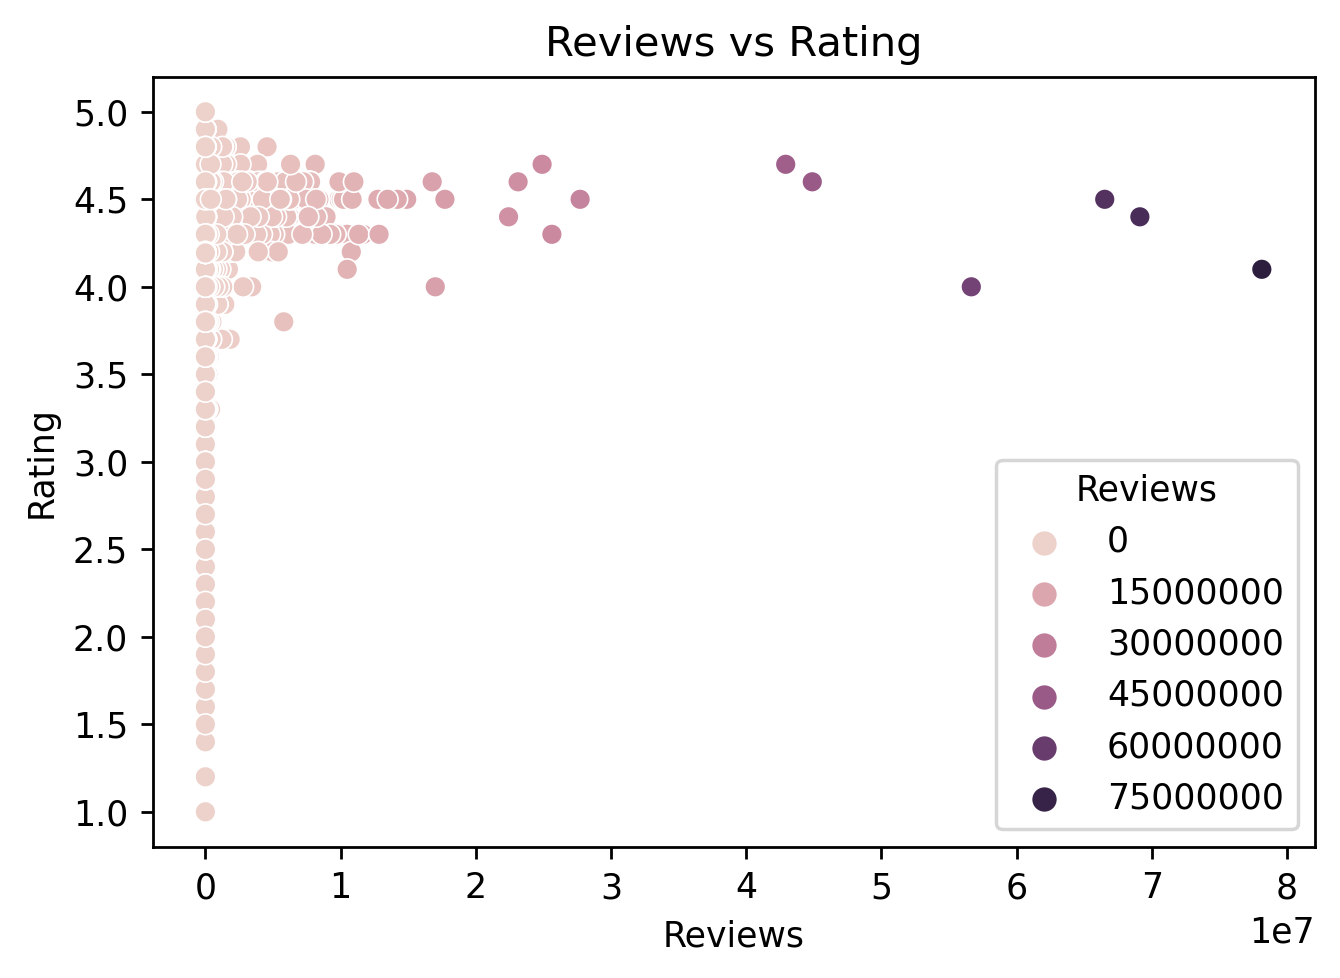

In [62]:
plt.figure(figsize=(6,4),dpi=250)
sns.scatterplot(x='Reviews', y='Rating', data=playstore_data, hue='Reviews')
plt.title('Reviews vs Rating')
plt.show()

# Category-Wise App Performance on Rating

In [49]:
category_performance = playstore_data.groupby('Category').agg({
    'Rating': 'mean',
    'Installs': 'mean'
}).reset_index()

In [54]:
playstore_data['Category'].value_counts().head()

Category
11    1968
14    1144
29     841
20     463
4      460
Name: count, dtype: int64

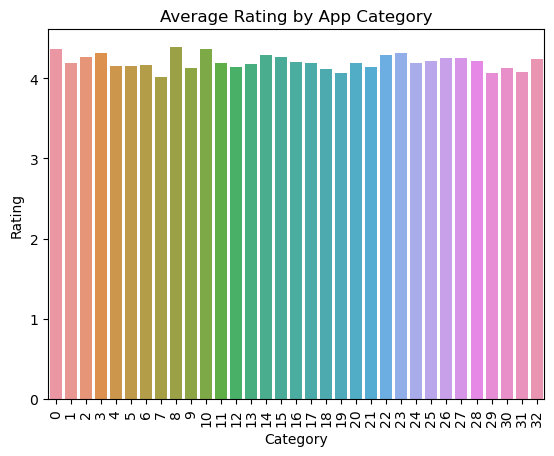

In [50]:
category_performance = category_performance.sort_values('Rating', ascending=False)
sns.barplot(x='Category', y='Rating', data=category_performance)
plt.xticks(rotation=90)
plt.title('Average Rating by App Category')
plt.show()

# Distribution of Ratings

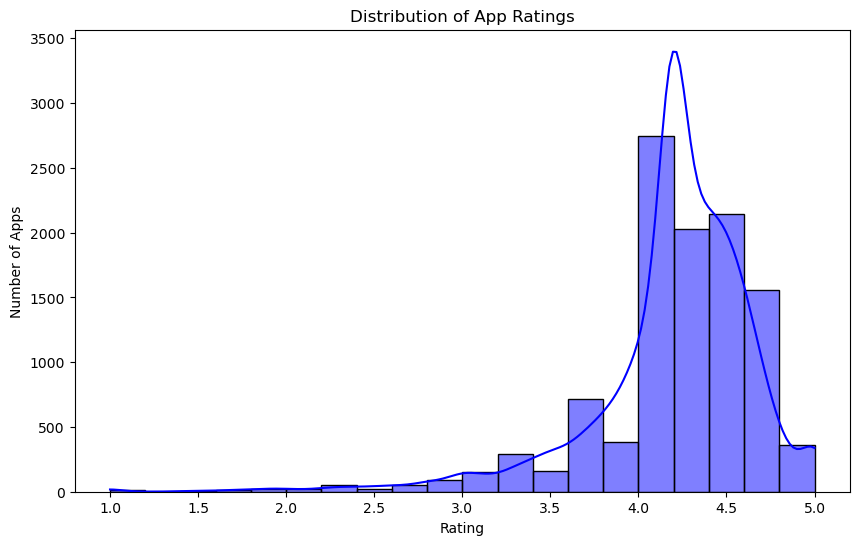

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(playstore_data['Rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.show()

# Random Forest on Apps Rating

In [27]:
playstore_data['Reviews'] = playstore_data['Reviews'].astype(int)
playstore_data['Installs'] = playstore_data['Installs'].str.replace(',', '').str.replace('+', '').astype(int)
playstore_data['Price'] = playstore_data['Price'].str.replace('$', '').astype(float)

In [28]:
playstore_data['Size'] = playstore_data['Size'].replace('Varies with device', np.nan)
playstore_data['Size'] = playstore_data['Size'].str.replace('M', '').str.replace('k', '').astype(float) * 1e6
playstore_data['Size'].fillna(playstore_data['Size'].mean(), inplace=True)

In [29]:
playstore_data['Last Updated'] = pd.to_datetime(playstore_data['Last Updated'])
playstore_data['Last Updated Year'] = playstore_data['Last Updated'].dt.year

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [31]:
label_enc = LabelEncoder()

In [32]:
playstore_data['Category'] = label_enc.fit_transform(playstore_data['Category'])
playstore_data['Type'] = label_enc.fit_transform(playstore_data['Type'].astype(str))
playstore_data['Content Rating'] = label_enc.fit_transform(playstore_data['Content Rating'].astype(str))
playstore_data['Genres'] = label_enc.fit_transform(playstore_data['Genres'].astype(str))

In [33]:
X = playstore_data[['Category', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated Year']]
y = playstore_data['Rating']

In [34]:
X_train = X[~y.isna()]
y_train = y.dropna()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [36]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [37]:
y_pred = rf_model.predict(X_test)

In [38]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [39]:
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 0.45540574739806594
